# TSA Mini-Project
## Air Quality Dataset<br>

Dataset Source: https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
# Making necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## Data Preprocessing

In [ ]:
df = pd.read_csv("/content/AirQuality.csv", sep = ";", decimal = ",", header = 0)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
df.drop(columns = ["Unnamed: 15", "Unnamed: 16"], inplace = True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
# Null value count in all columns
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

<Axes: >

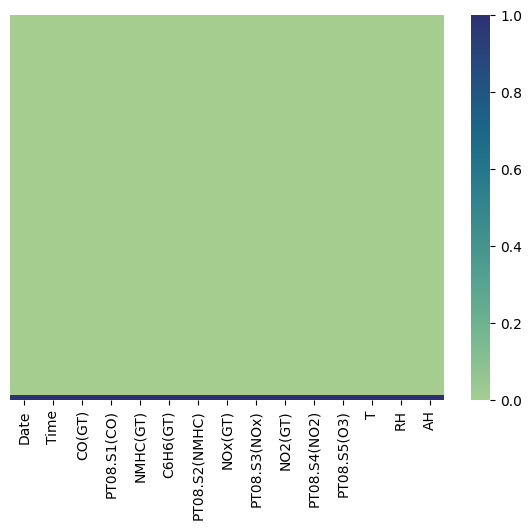

In [ ]:
# visualizing the null values using heatmap
plt.figure(figsize = (7, 5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

All null values are at the trailing rows of the dataset.<br>
Using `dropna` to remove these rows.

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()
# sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

But the description of dataset says that the null values are labelled with -200 value in the dataset

In [ ]:
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

<Axes: >

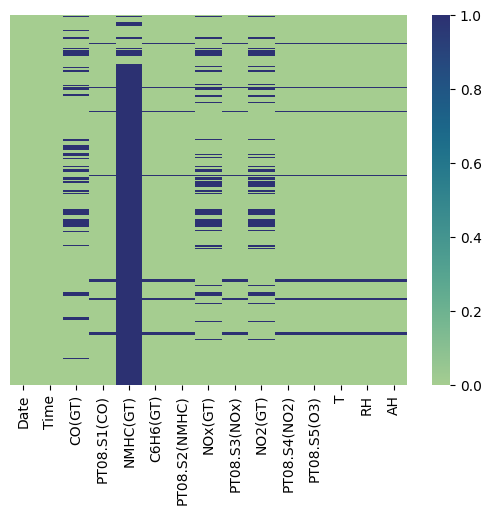

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

'`NMHC(GT)`' column has too many null values.<br>
Therefore, removing this column from the dataset.

In [ ]:
df.drop('NMHC(GT)', axis = 1, inplace = True)
df.shape

(9357, 14)

In [ ]:
null_values = df.isnull().sum().sort_values(ascending = False)
null_values

CO(GT)           1683
NO2(GT)          1642
NOx(GT)          1639
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Date                0
Time                0
dtype: int64

In [ ]:
cols_with_null_vals = list(null_values[null_values > 0].index)
cols_with_null_vals

['CO(GT)',
 'NO2(GT)',
 'NOx(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

Filling the null values in each column with the mean value of that column.

In [ ]:
# Filling null values with mean
for col in cols_with_null_vals:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Parsing Dates
Making Python recognize the values in column '`Date`' as dates.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

### Removing Outliers

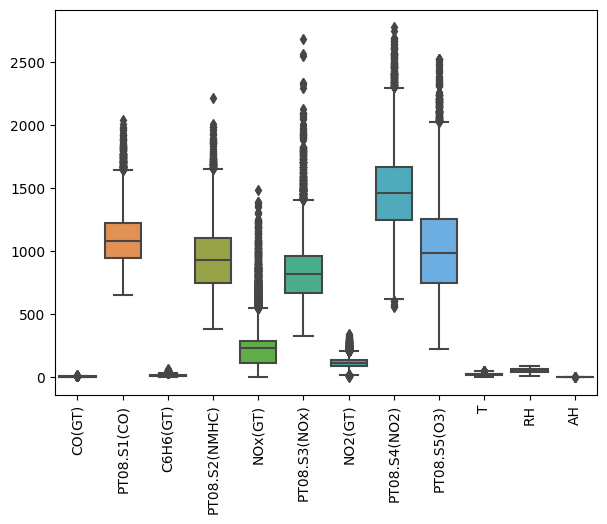

In [ ]:
# plotting boxplots
plt.figure(figsize=(7,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

There are a lot of data points which lies outside the whiskers.<br>
Let's get a count of the outliers present in each column.

In [ ]:
# getting the first and third quartile values of each column
Q1 = df.quantile(0.25, numeric_only = True)
Q3 = df.quantile(0.75, numeric_only = True)

# finally calculating the interquartile range IQR
IQR = Q3 - Q1

In [ ]:
Q1

CO(GT)              1.2000
PT08.S1(CO)       941.0000
C6H6(GT)            4.6000
PT08.S2(NMHC)     743.0000
NOx(GT)           112.0000
PT08.S3(NOx)      666.0000
NO2(GT)            86.0000
PT08.S4(NO2)     1242.0000
PT08.S5(O3)       742.0000
T                  12.0000
RH                 36.6000
AH                  0.7461
Name: 0.25, dtype: float64

In [ ]:
Q3

CO(GT)              2.6000
PT08.S1(CO)      1221.0000
C6H6(GT)           13.6000
PT08.S2(NMHC)    1105.0000
NOx(GT)           284.0000
PT08.S3(NOx)      960.0000
NO2(GT)           133.0000
PT08.S4(NO2)     1662.0000
PT08.S5(O3)      1255.0000
T                  24.1000
RH                 61.9000
AH                  1.2962
Name: 0.75, dtype: float64

In [ ]:
IQR

CO(GT)             1.4000
PT08.S1(CO)      280.0000
C6H6(GT)           9.0000
PT08.S2(NMHC)    362.0000
NOx(GT)          172.0000
PT08.S3(NOx)     294.0000
NO2(GT)           47.0000
PT08.S4(NO2)     420.0000
PT08.S5(O3)      513.0000
T                 12.1000
RH                25.3000
AH                 0.5501
dtype: float64

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
num_outliers = []

for col in df.columns[2:]:
    num_outliers.append((( df[col] < (Q1 - (1.5 * IQR))[col] ) | ( df[col] > (Q3 + (1.5 * IQR))[col] )).sum())

outlierCount = pd.Series(data = num_outliers, index = df.columns[2:], name = "Outlier Count")
outlierCount

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
Name: Outlier Count, dtype: int64

In [ ]:
outlierCount.values

array([454, 145, 286,  91, 778, 278, 380, 131, 131,  10,   0,   7])

As mean value is highly influenced by the outliers, we will use median to replace the outliers.

In [ ]:
outlierOrNotDf = []
# outlierOrNotCol = []

for col in df.columns[2:]:
    outlierOrNotCol =  ( ( df[col] < (Q1 - (1.5 * IQR))[col] ) | ( df[col] > (Q3 + (1.5 * IQR))[col] ) )
    outlierOrNotDf.append(outlierOrNotCol.values)
    outlierOrNotCol = []

outlierOrNotDf = np.array(outlierOrNotDf)

df_is_outlier_or_not = pd.DataFrame(data = outlierOrNotDf.T, columns = df.columns[2:])
df_is_outlier_or_not.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_is_outlier_or_not['NOx(GT)'].sum()

778

In [ ]:
# Now replacing all the outliers in each column with the median of that column

for col in df_is_outlier_or_not.columns:
    df[col].astype('float')
    colMedian = df[col].median()
    df.loc[df_is_outlier_or_not[col], col] = colMedian

In [ ]:
num_outliers = []

for col in df.columns[2:]:
    num_outliers.append((( df[col] < (Q1 - (1.5 * IQR))[col] ) | ( df[col] > (Q3 + (1.5 * IQR))[col] )).sum())

outlierCount = pd.Series(data = num_outliers, index = df.columns[2:], name = "Outlier Count")
outlierCount

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Name: Outlier Count, dtype: int64

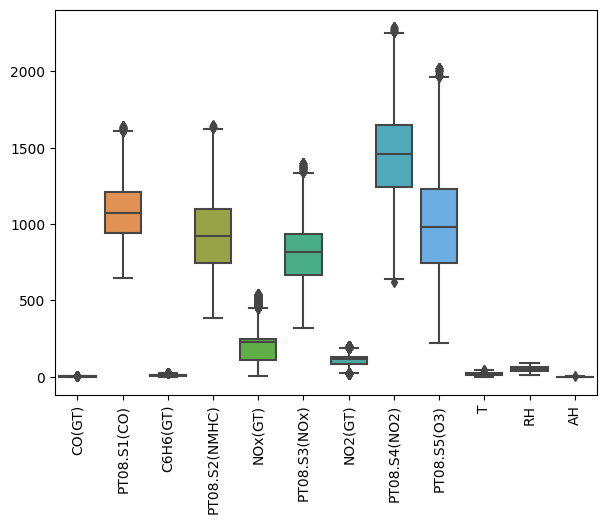

In [ ]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.1+ MB


In [ ]:
df.to_csv('Cleaned_Air_Quality_Dataset')

<ipython-input-34-603ae9c8a372>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)


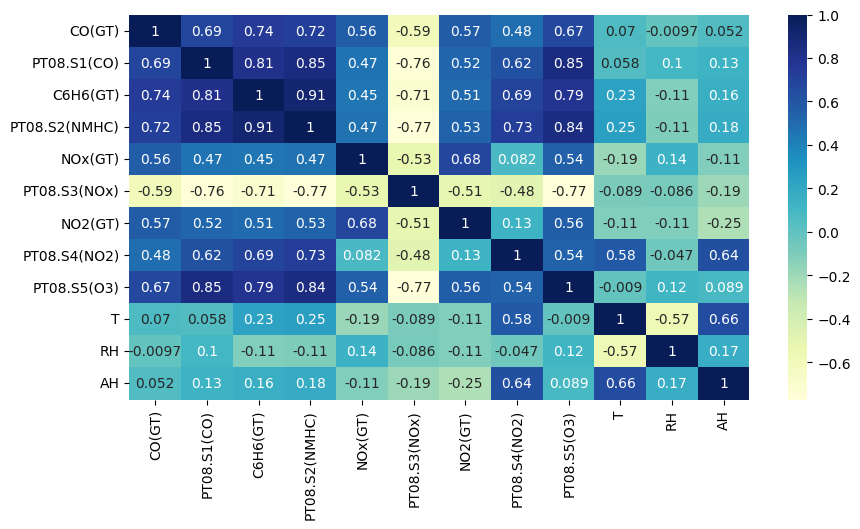

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

## Plotting Data in Numerical Columns

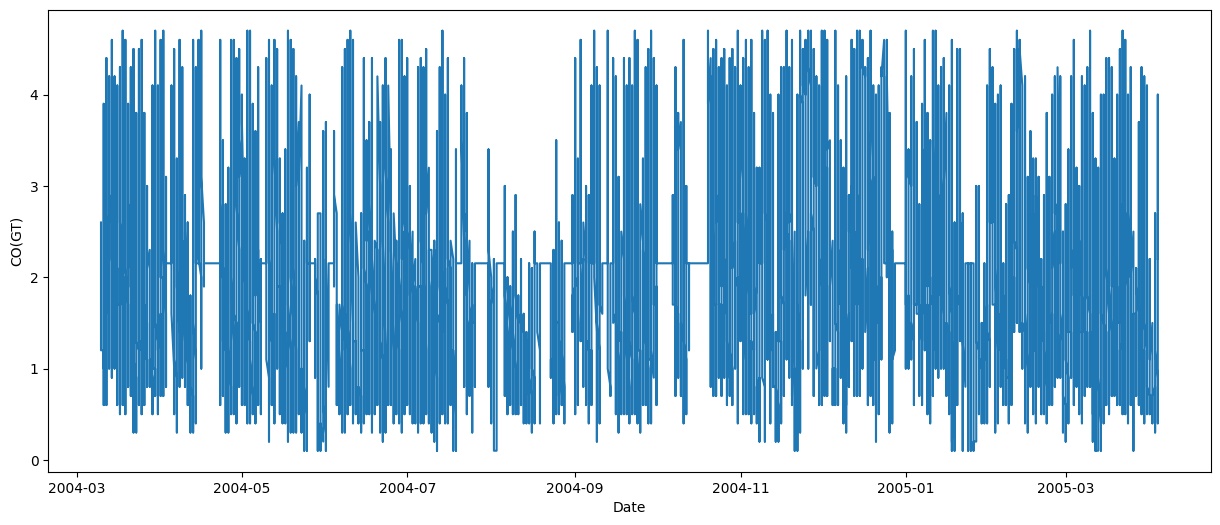

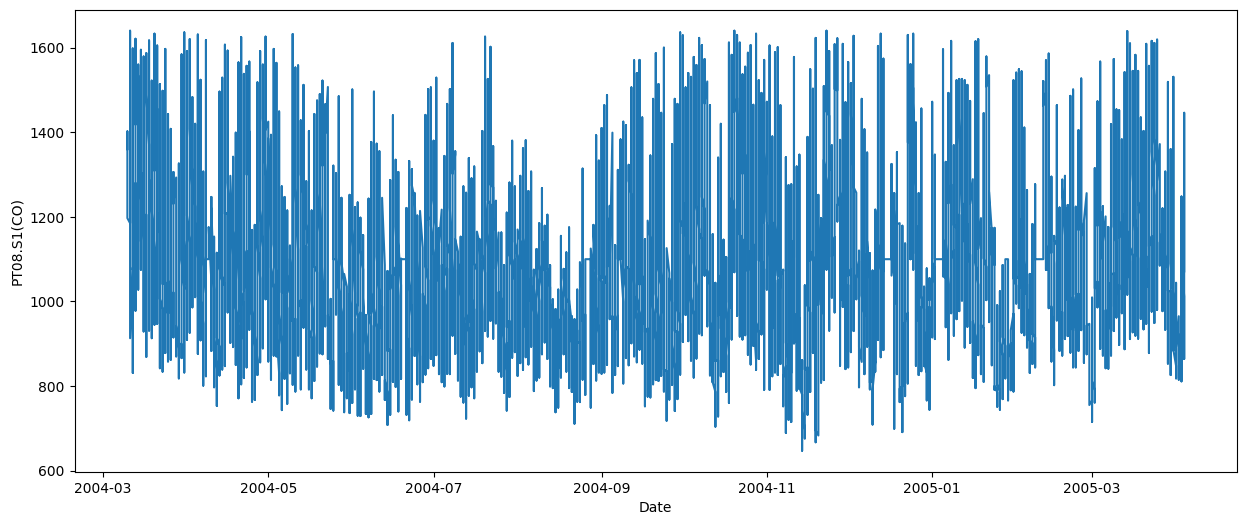

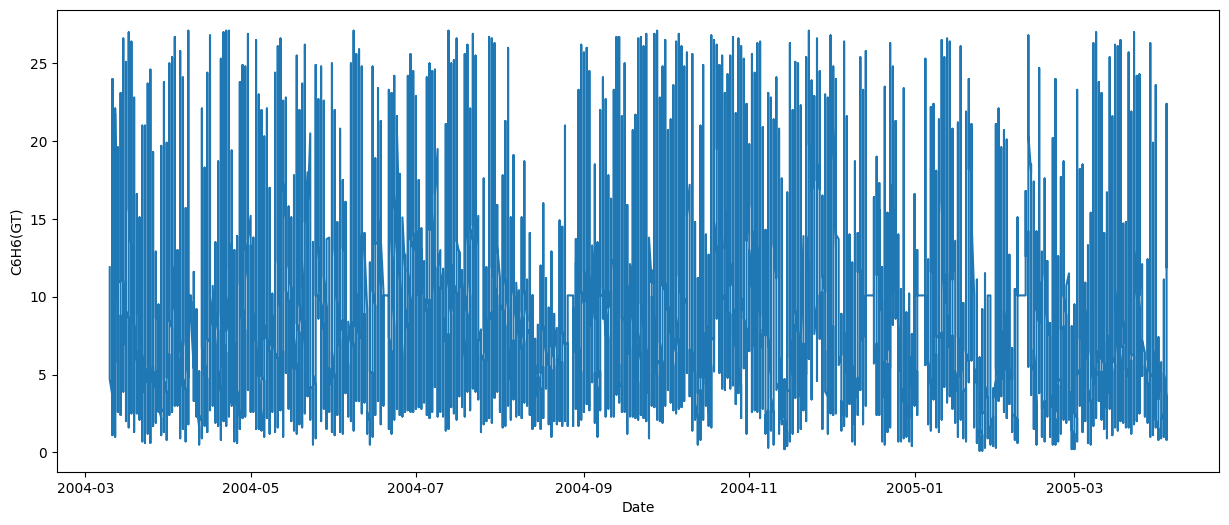

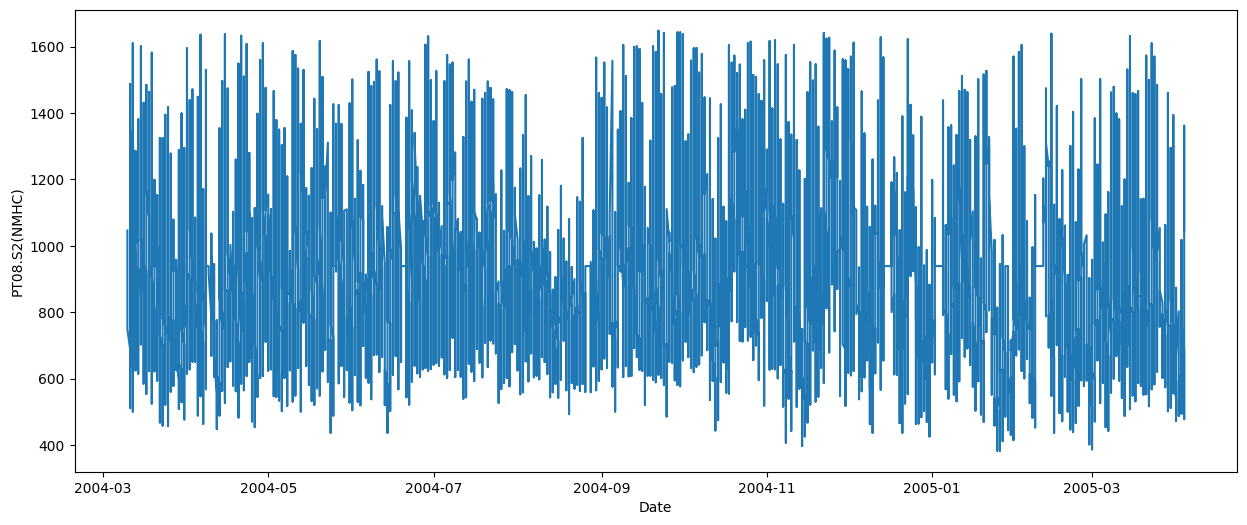

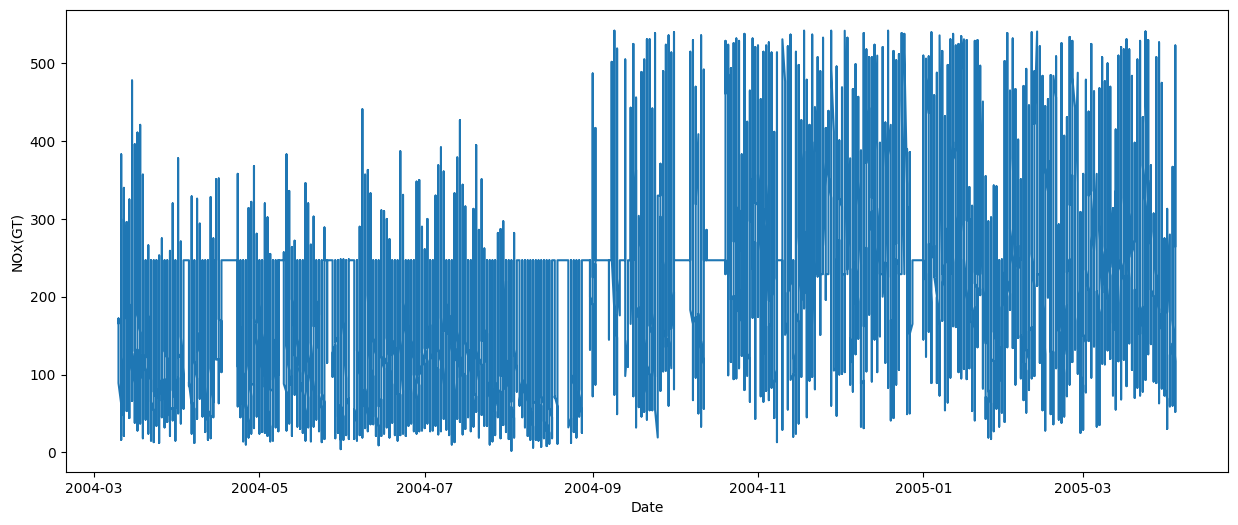

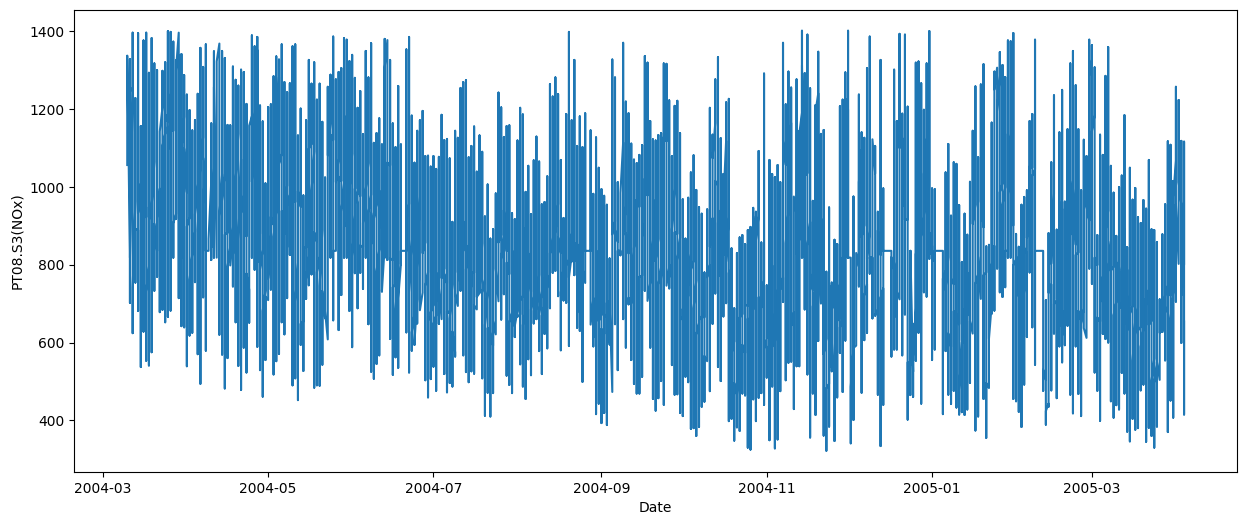

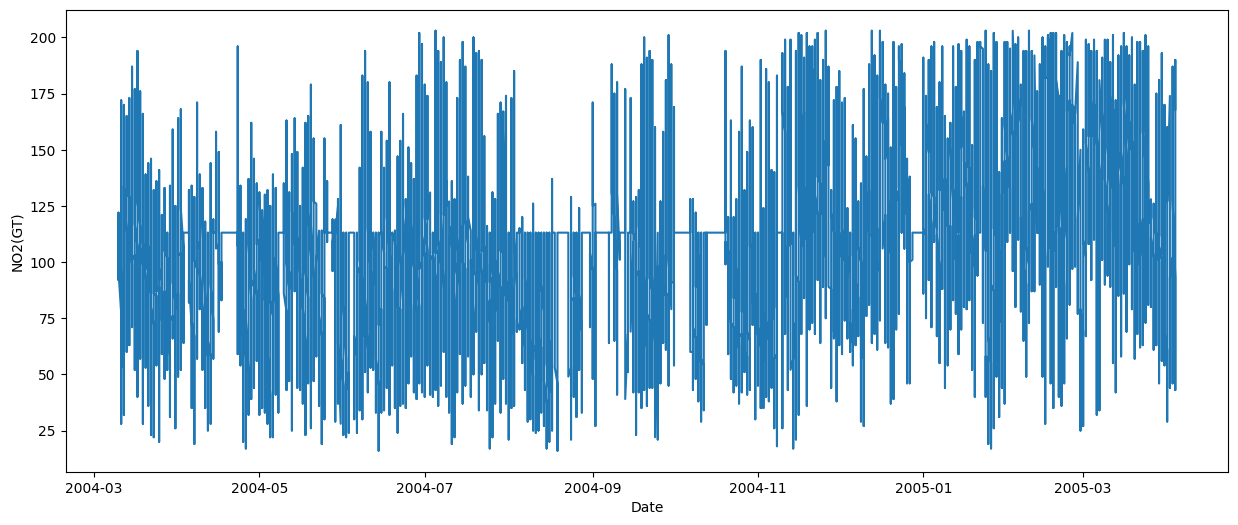

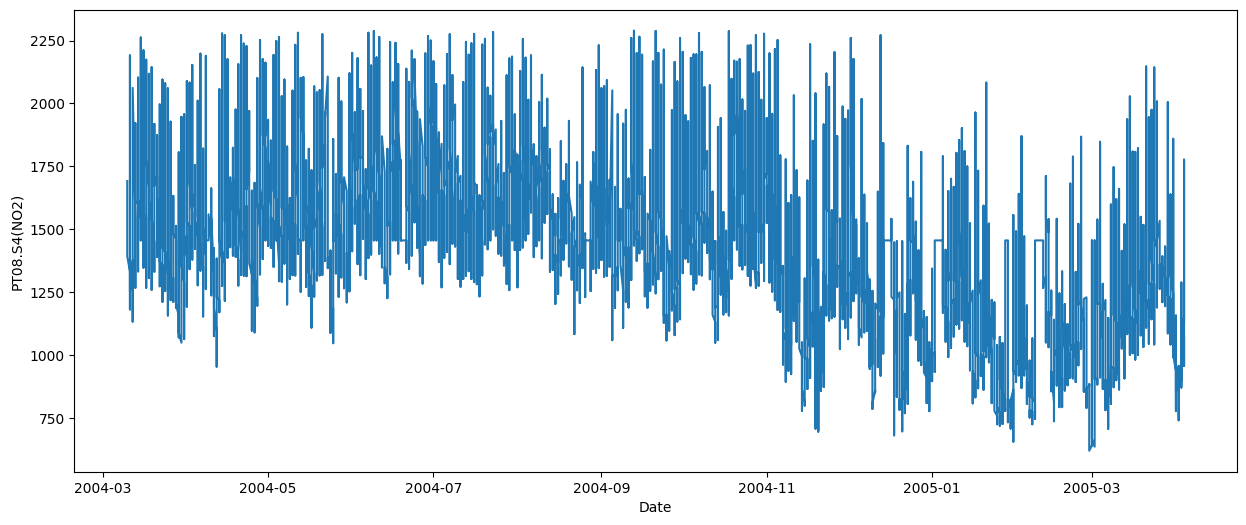

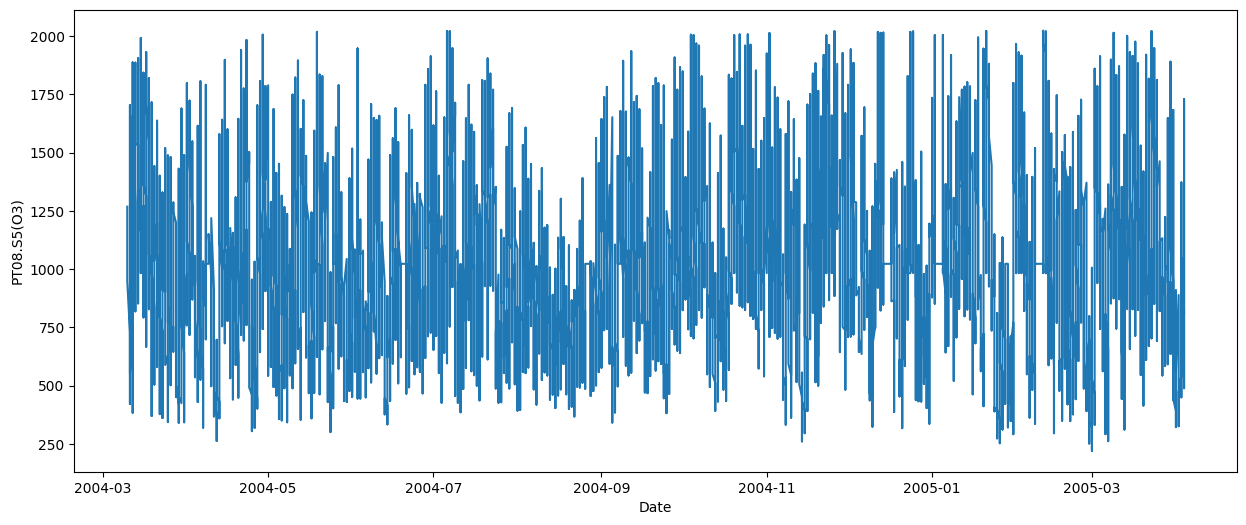

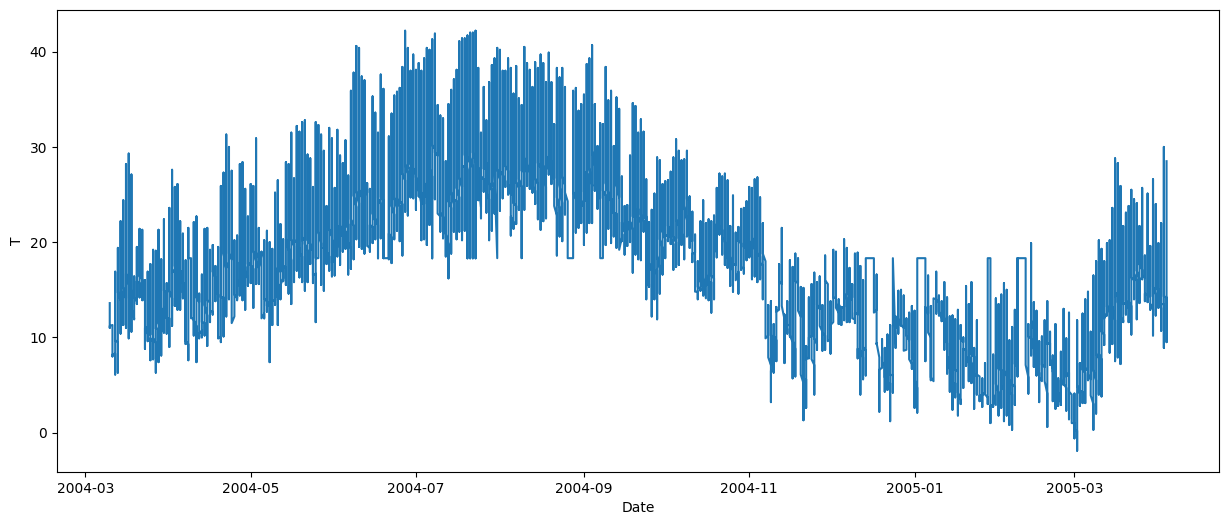

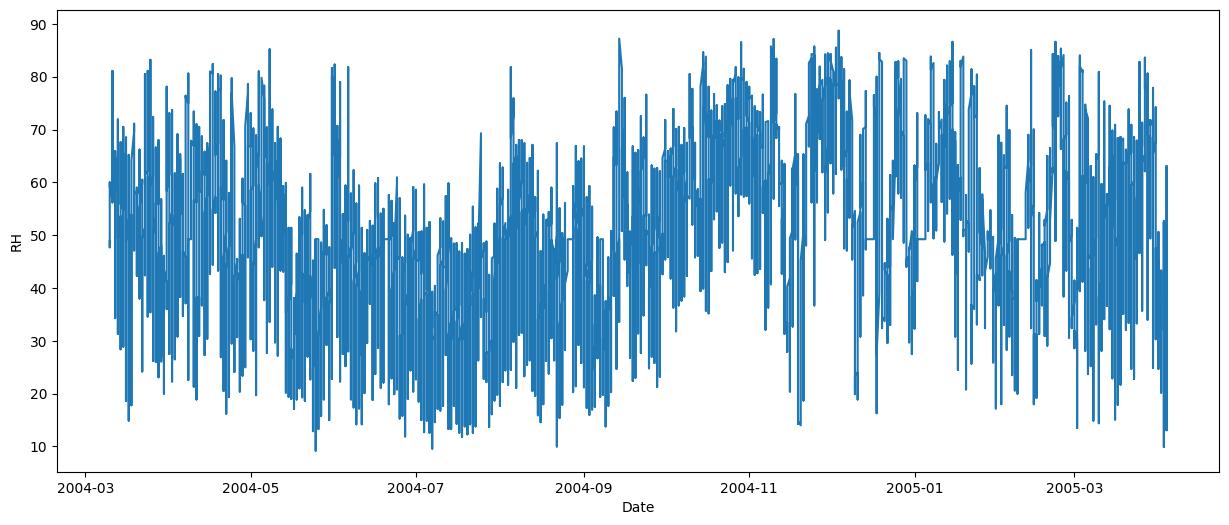

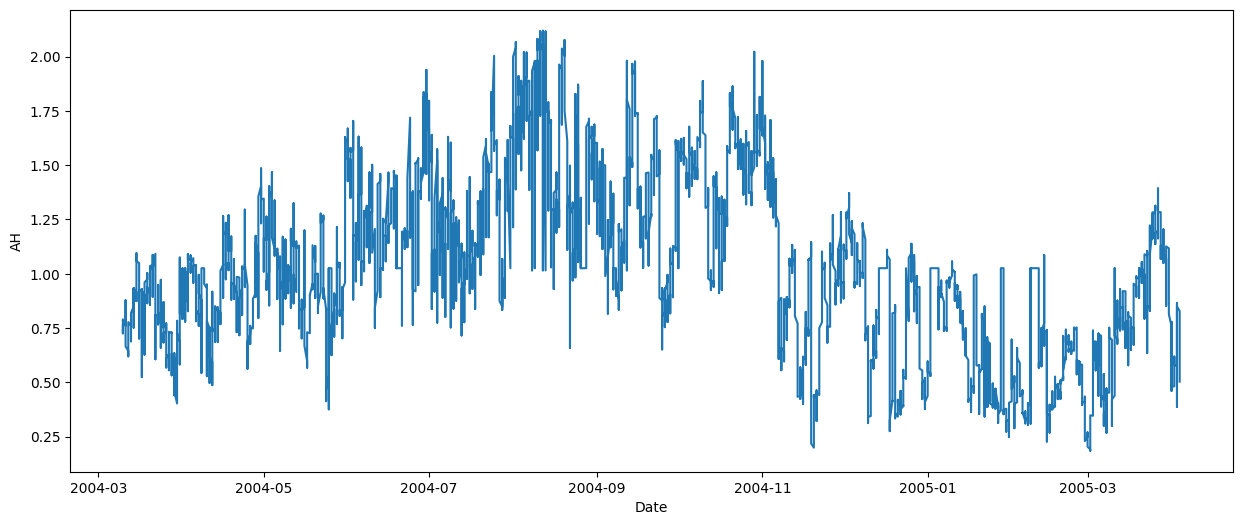

In [ ]:
for col in df.columns[2:]:
    plt.figure(figsize = (15, 6))
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.plot(df['Date'], df[col])
    plt.show()
    print()

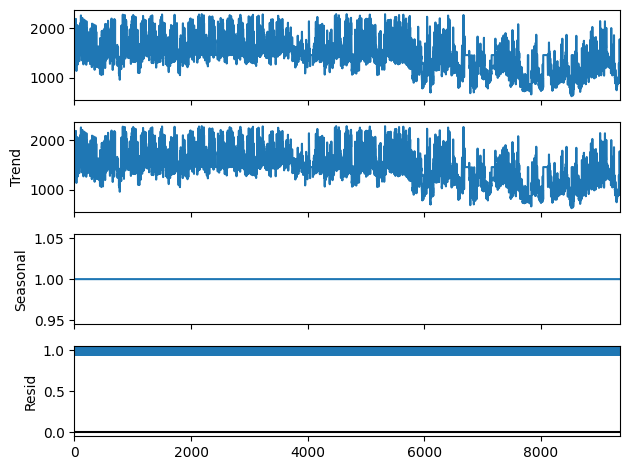

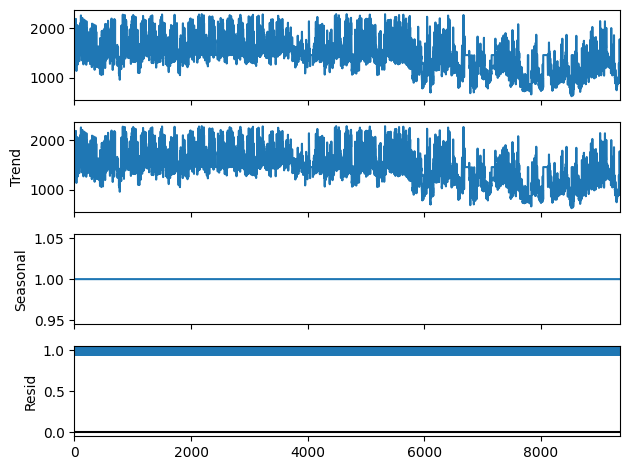

In [ ]:
analysis = df[['PT08.S4(NO2)']].copy()
decompose_res_mult = seasonal_decompose(analysis, model = 'multiplicative', period = 1)

trend = decompose_res_mult.trend
seasonal = decompose_res_mult.seasonal
residual = decompose_res_mult.resid

decompose_res_mult.plot()

In [ ]:
# def Augmented_Dickey_Fuller_Test_func(series , column_name):
#     print (f'Results of Dickey-Fuller Test for column: {column_name}')
#     dftest = adfuller(series, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#        dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

#     if dftest[1] <= 0.05:
#         print("Conclusion:====>")
#         print("Reject the null hypothesis")
#         print("Data is stationary")
#     else:
#         print("Conclusion:====>")
#         print("Fail to reject the null hypothesis")
#         print("Data is non-stationary")

In [ ]:
def adfTest(series , column_name):
    print ("Results of ADF Test for column: '" + column_name + "'")

    dftest = adfuller(series, autolag='aic')

    dfoutput = pd.Series(dftest[0:4], index=['adf','pValue','usedLag','nObs'])

    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)' %key] = value
       # Critical values for the ADF test for 1%, 5%, and 10% significance levels with the
       # constant model are −3.43, −2.87, and −2.57, respectively.
    print(dfoutput)
    print()

    if (dftest[0] < dftest[4]['1%']) and (dftest[1] < 0.05):
        print("Conclusion:")
        print("Reject the null hypothesis.")
        print("Data is stationary.")
        print("Data does not have a unit root.")
    else:
        print("Conclusion:")
        print("Fail to reject the null hypothesis.")
        print("Data is non-stationary.")
        print("Data has a unit root.")

In [ ]:
adfTest(df['PT08.S4(NO2)'] , 'PT08.S4(NO2)')

Results of ADF Test for column: 'PT08.S4(NO2)'
adf                    -6.403817e+00
pValue                  1.965629e-08
usedLag                 3.800000e+01
nObs                    9.318000e+03
Critical Value (1%)    -3.431052e+00
Critical Value (5%)    -2.861850e+00
Critical Value (10%)   -2.566935e+00
dtype: float64

Conclusion:
Reject the null hypothesis.
Data is stationary.
Data does not have a unit root.


In [ ]:
for i in range(len(df.columns)):
    print(i, df.columns[i])

0 Date
1 Time
2 CO(GT)
3 PT08.S1(CO)
4 C6H6(GT)
5 PT08.S2(NMHC)
6 NOx(GT)
7 PT08.S3(NOx)
8 NO2(GT)
9 PT08.S4(NO2)
10 PT08.S5(O3)
11 T
12 RH
13 AH


In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Train-test split

In [ ]:
df.shape

(9357, 14)

In [ ]:
0.2 * 9357

1871.4

In [ ]:
X = df[['PT08.S4(NO2)']]
train, test = X[0: -1870], X[-1870: ]

In [ ]:
train.head()

,PT08.S4(NO2)
0,1692.0
1,1559.0
2,1555.0
3,1584.0
4,1490.0


In [ ]:
len(train)

7487

In [ ]:
test.head()

,PT08.S4(NO2)
7487,872.0
7488,893.0
7489,977.0
7490,984.0
7491,893.0


In [ ]:
len(test)

1870

The pmdarima modeule will help us to identify p, d, q without the hassle of looking at the plot.

In [ ]:
stepwise_model = auto_arima(train,start_p = 1, start_q = 1,
                            max_p = 5, max_q = 5,
                            seasonal=False,
                            d=None,
                            trace = True,
                            error_action = 'ignore',
                            suppress_warnings = True,
                            stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=96735.115, Time=11.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=97644.589, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=97421.354, Time=0.92 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=97395.253, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=97642.593, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=96725.971, Time=22.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=97402.881, Time=1.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=96690.038, Time=8.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=97371.815, Time=0.99 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=96660.005, Time=14.74 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=97282.509, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=96659.085, Time=18.46 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=97214.764, Time=2.75 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=34.93 sec
 ARIMA(4,1,2)(0,0,0)

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7487
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -48298.859
Date:                Tue, 05 Dec 2023   AIC                          96611.719
Time:                        03:33:29   BIC                          96660.164
Sample:                             0   HQIC                         96628.356
                               - 7487                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5803      0.019     82.720      0.000       1.543       1.618
ar.L2         -0.5384      0.018    -30.516      0.000      -0.573      -0.504
ar.L3         -0.1171      0.017     -6.875      0.000      -0.151      -0.084
ar.L4          0.0080      0.012      0.649      0.516      -0.016       0.032
ma.L1         -1.8679      0.018   -105.511      0.000      -1.903      -1.833
ma.L2          0.8830      0.017     52.791      0.000       0.850       0.916
sigma2      2.365e+04    250.308     94.492      0.000    2.32e+04    2.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6563.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast, conf_int = stepwise_model.predict(n_periods = 1870, return_conf_int = True)
forecast = pd.DataFrame(forecast, columns = ['PT08.S4(NO2)_pred'])

In [ ]:
forecast.head()

,PT08.S4(NO2)_pred
7487,934.145676
7488,986.925976
7489,1025.520142
7490,1049.595828
7491,1061.284084


In [ ]:
len(df) - 1 - 1870

7486

In [ ]:
df_conf = pd.DataFrame(conf_int, columns = ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(7486, 9356)
df_conf = df_conf.set_index("new_index")
df_conf.head()

,Upper_bound,Lower_bound
new_index,,
7486,632.717171,1235.574181
7487,616.831472,1357.020480
7488,613.269496,1437.770787
7489,614.020676,1485.170981
7490,612.931963,1509.636205


In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
df['PT08.S4(NO2)'].describe()

count    9357.000000
mean     1443.756066
std       318.094987
min       621.000000
25%      1243.000000
50%      1456.264598
75%      1648.000000
max      2289.000000
Name: PT08.S4(NO2), dtype: float64

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 112786.95648563383
MAE is : 255.65142273336357
RMSE is : 335.8376936641178
MAPE is : 20.13027862011534
R2 is : -0.5657140582479991



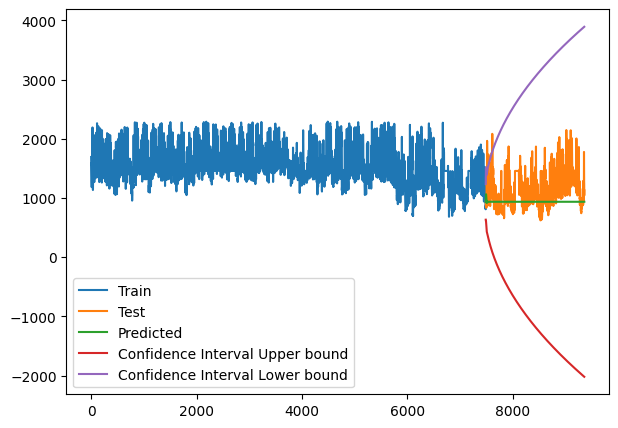

In [ ]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(forecast, label = 'Predicted')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound')
plt.legend(loc='best')
plt.show()

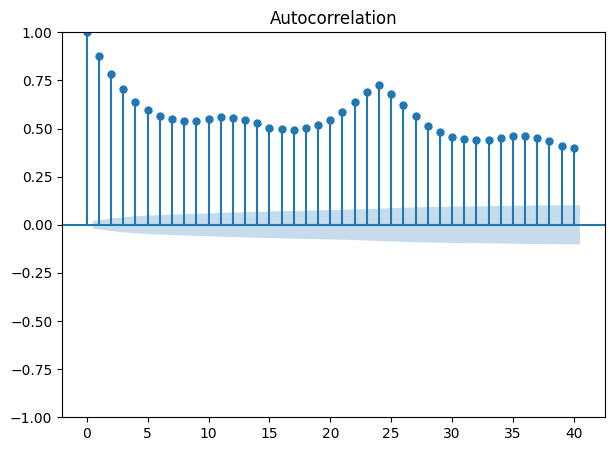

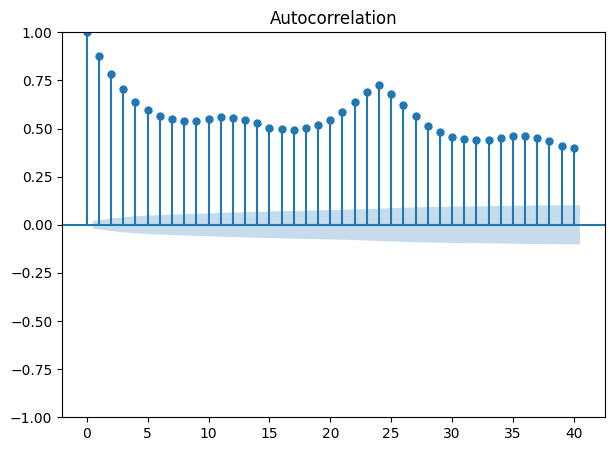

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['PT08.S4(NO2)'])

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
model = arch_model(train, mean='Zero', vol='ARCH', p=40)

In [ ]:
model_fit = model.fit()

## CNN Model

In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers import Conv1D, MaxPooling1D

In [ ]:
def train_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(0, len(sequence)-30):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [ ]:
raw_sequence = df['PT08.S4(NO2)']
steps = 30

X_train, y_train = train_split_sequence(raw_sequence[:-1870], steps)
X_test, y_test = train_split_sequence(raw_sequence[-1871:].reset_index(drop = True), steps)

In [ ]:
print("The input to the CNN :\n", X_train[:1])
print("**************************************\n")
print("The features (X), lagged values of time series, for our CNN Model")
print(X_train[:1])
print("**************************************\n")
print("The respective observed values (y) of sequence for training our CNN Model")
print(y_train[:1])

The input to the CNN :
 [[[1692.        ]
  [1559.        ]
  [1555.        ]
  [1584.        ]
  [1490.        ]
  [1393.        ]
  [1333.        ]
  [1333.        ]
  [1276.        ]
  [1235.        ]
  [1197.        ]
  [1182.        ]
  [1221.        ]
  [1339.        ]
  [1517.        ]
  [1583.        ]
  [1446.        ]
  [1362.        ]
  [1401.        ]
  [1537.        ]
  [1730.        ]
  [1647.        ]
  [1591.        ]
  [1719.        ]
  [2083.        ]
  [1456.26459793]
  [2191.        ]
  [1707.        ]
  [1333.        ]
  [1252.        ]]]
**************************************

The features (X), lagged values of time series, for our CNN Model
[[[1692.        ]
  [1559.        ]
  [1555.        ]
  [1584.        ]
  [1490.        ]
  [1393.        ]
  [1333.        ]
  [1333.        ]
  [1276.        ]
  [1235.        ]
  [1197.        ]
  [1182.        ]
  [1221.        ]
  [1339.        ]
  [1517.        ]
  [1583.        ]
  [1446.        ]
  [1362.        ]
  [1

In [ ]:
features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], features))

print("After reshaping, the shape of X_train:")
print(X_train.shape)
print("**************************************\n")

print("The final form of input feature matrix X_train:")
print(X_train[:1])
print("**************************************\n")

print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n",
      "a sequence to matrix with image matrix shape to find patterns in sequence")

After reshaping, the shape of X_train:
(7457, 30, 1)
**************************************

The final form of input feature matrix X_train:
[[[1692.        ]
  [1559.        ]
  [1555.        ]
  [1584.        ]
  [1490.        ]
  [1393.        ]
  [1333.        ]
  [1333.        ]
  [1276.        ]
  [1235.        ]
  [1197.        ]
  [1182.        ]
  [1221.        ]
  [1339.        ]
  [1517.        ]
  [1583.        ]
  [1446.        ]
  [1362.        ]
  [1401.        ]
  [1537.        ]
  [1730.        ]
  [1647.        ]
  [1591.        ]
  [1719.        ]
  [2083.        ]
  [1456.26459793]
  [2191.        ]
  [1707.        ]
  [1333.        ]
  [1252.        ]]]
**************************************

Feature matrix X is ready for input to CNN model. We have used feature engineering to convert
 a sequence to matrix with image matrix shape to find patterns in sequence


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 14, 64)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 896)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               89700     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89993 (351.54 KB)
Trainable params: 89993 (351.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
234/234 [==============================] - 5s 11ms/step - loss: 72553.8281
Epoch 2/50
234/234 [==============================] - 2s 9ms/step - loss: 31729.8340
Epoch 3/50
234/234 [==============================] - 2s 9ms/step - loss: 30520.6074
Epoch 4/50
234/234 [==============================] - 2s 9ms/step - loss: 30773.8047
Epoch 5/50
234/234 [==============================] - 2s 9ms/step - loss: 28392.7168
Epoch 6/50
234/234 [==============================] - 4s 19ms/step - loss: 29889.5820
Epoch 7/50
234/234 [==============================] - 2s 11ms/step - loss: 29070.8027
Epoch 8/50
234/234 [==============================] - 2s 7ms/step - loss: 27983.9121
Epoch 9/50
234/234 [==============================] - 2s 9ms/step - loss: 28613.2461
Epoch 10/50
234/234 [==============================] - 2s 8ms/step - loss: 28147.8906
Epoch 11/50
234/234 [==============================] - 2s 6ms/step - loss: 28047.3887
Epoch 12/50
234/234 [==============================] - 2s 10

In [ ]:
# x_test, y_test = train_split_sequence(raw_sequence, steps)

# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))

The next predicted output vs original is:


,y_pred,y_test
0,1360.525513,1375.0
1,1240.962280,1378.0
2,1326.296509,1304.0
3,1278.595825,1187.0
4,1237.082886,1134.0


In [ ]:
y_pred = model.predict(X_test, verbose=0)

print(f"The next predicted output vs original is:")
data = pd.DataFrame(y_pred, columns=['y_pred'])
data["y_test"] = y_test
data.head()

The next predicted output vs original is:


,y_pred,y_test
0,1234.507446,1053.0
1,1174.697021,1010.0
2,1121.568848,993.0
3,982.425415,948.0
4,968.456665,901.0


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

def timeseries_evaluation_metrics_func(y_true, y_pred , model_name):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Evaluation metric results for {model_name}:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(y_test, y_pred , 'CNN')

Evaluation metric results for CNN:-
MSE is : 21768.224114424003
MAE is : 104.7131971634611
RMSE is : 147.54058463495392
MAPE is : 26.729389313573126
R2 is : 0.6973242882279987



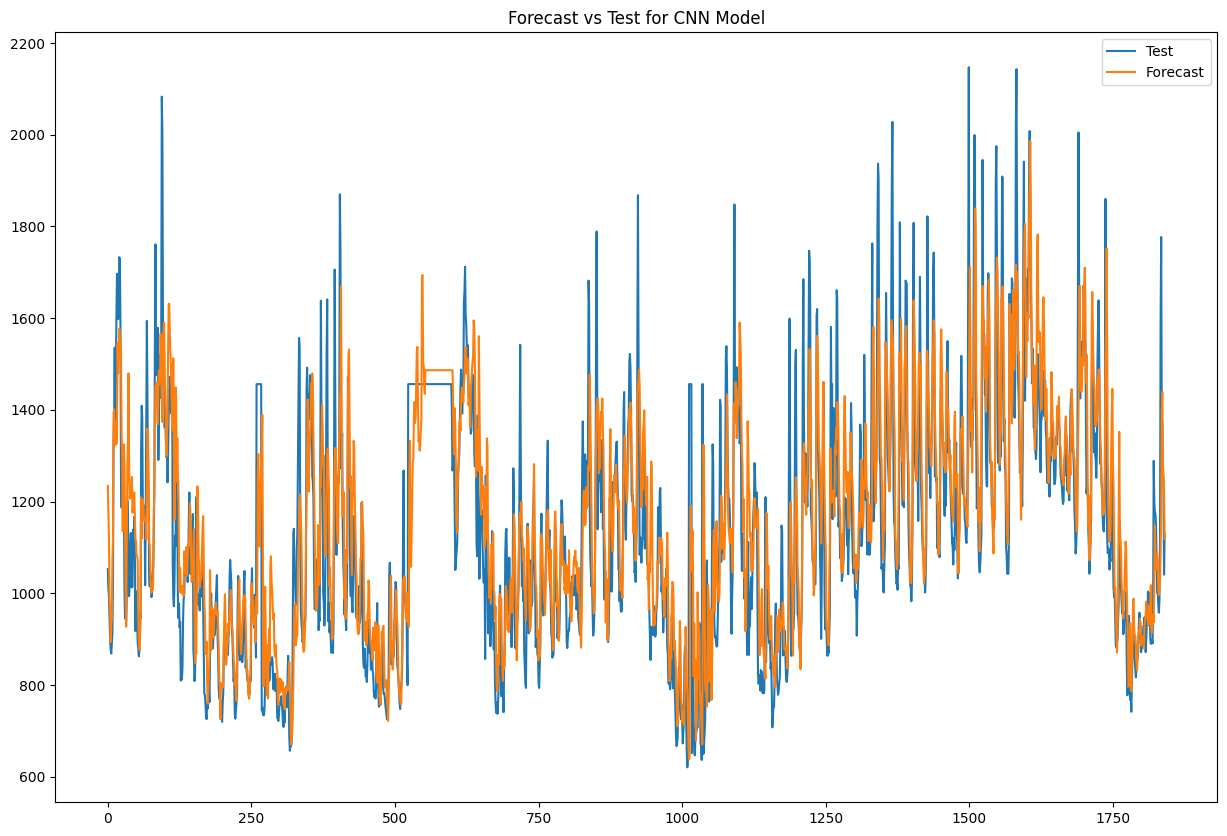

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Forecast vs Test for CNN Model')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Forecast')
plt.legend(loc = 'best')
plt.show()